In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline

import statsmodels.api as sum
import seaborn as sns

import chart_studio.plotly as py

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf #Connects Plotly to Pandas
# Makes Plotly work in your Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot
init_notebook_mode(connected=True)
cf.go_offline()

import requests # Get URL data
from bs4 import BeautifulSoup # Manipulate URL data
import json
from pandas import DataFrame as df

# used to measure whether out data is atationary
from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.stattools import adf_test


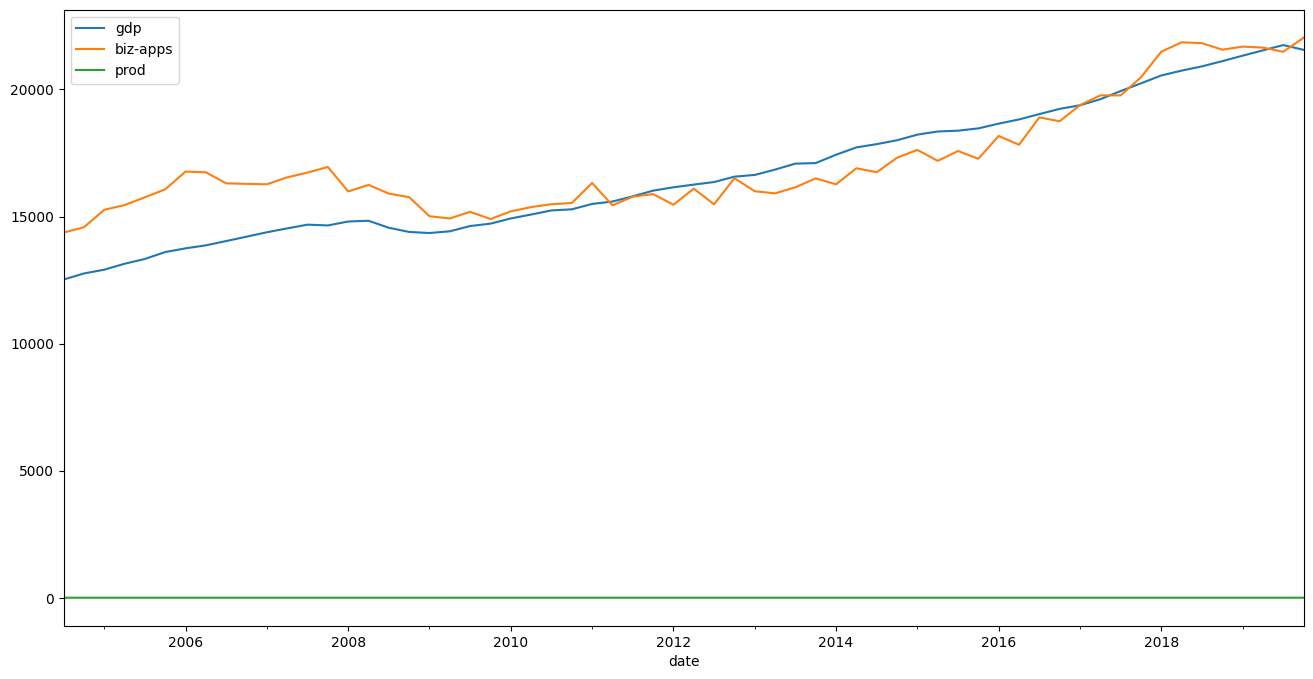

In [7]:
from statsmodels.tsa.api import VAR

# gdp_df = pd.read_csv('../datasets/gdp-data.csv', index_col='date', parse_dates=True)

# gdp_df = gdp_df[gdp_df.index>'2020-03-01']
# gdp_df = gdp_df.dropna()
# gdp_df = gdp_df.asfreq('QE')

# ax = gdp_df['gdp'].plot(legend=True, figsize=(16, 8))

# gdp_df['biz-apps'] = gdp_df['biz-apps'] * .025
# gdp_df['biz-apps'].plot(legend=True)

# gdp_df['prod'] = gdp_df['prod'] * .025
# gdp_df['prod'].plot(legend=True)

gdp_df = pd.read_csv('../datasets/gdp-data.csv', index_col='date', parse_dates=True)

gdp_df = gdp_df[gdp_df.index < '2020-03-01']
gdp_df = gdp_df.dropna()

# Convert 'biz-apps' and 'prod' columns
gdp_df['biz-apps'] = gdp_df['biz-apps'] * 0.025
gdp_df['prod'] = gdp_df['prod'] * 0.025

# Plotting
fig, ax = plt.subplots(figsize=(16, 8))
gdp_df['gdp'].plot(ax=ax, legend=True)
gdp_df['biz-apps'].plot(ax=ax, legend=True)
gdp_df['prod'].plot(ax=ax, legend=True)

plt.show()


#### Make Data Stationary

<Axes: xlabel='date'>

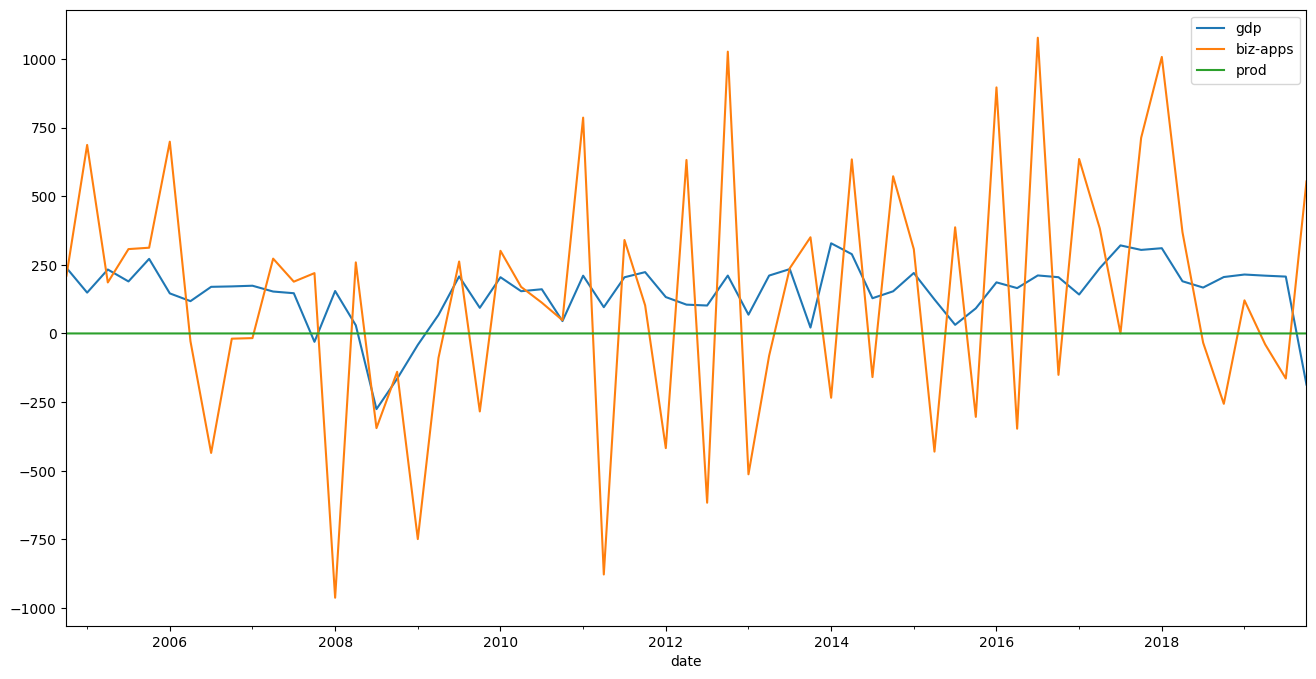

In [13]:
gdp_diff_df = gdp_df.diff()
gdp_diff_df = gdp_diff_df.dropna()
ax= gdp_diff_df['gdp'].plot(legend=True, figsize=(16, 8))

gdp_diff_df['biz-apps'].plot(legend=True)
gdp_diff_df['prod'].plot(legend=True)

# adf_test(gdp_diff_df['gdp'])
# adf_test(gdp_diff_df['biz-apps'])
# adf_test(gdp_diff_df['prod'])

#### Train and Test

In [19]:
gdp_diff_df.size
train_df = gdp_diff_df[:146]
test_df = gdp_diff_df[146:]

model =  VAR(train_df)

for p in range(1,8):
    res = model.fit(p)
    print(f'Order : {p}, AIC : {res.aic}')

res = model.fit(1)
res.summary()

Order : 1, AIC : 11.667093085046625
Order : 2, AIC : 11.743219920229677
Order : 3, AIC : 11.81053365248439
Order : 4, AIC : 12.011059738889058
Order : 5, AIC : 12.060842834929247
Order : 6, AIC : 12.170854056074445
Order : 7, AIC : 12.23173854707773


c:\Users\ADMIN\Documents\GitHub\Python-for-Full-Data-Science\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QE-DEC will be used.



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 29, Apr, 2024
Time:                     17:42:55
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    12.0860
Nobs:                     60.0000    HQIC:                   11.8309
Log likelihood:          -593.422    FPE:                    116738.
AIC:                      11.6671    Det(Omega_mle):         96189.1
--------------------------------------------------------------------
Results for equation gdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              65.707462        24.205971            2.715           0.007
L1.gdp              0.634429         0.158564            4.001           0.000
L1.biz-apps        -0.010715         0.031128           -0.344        

#### Plotting

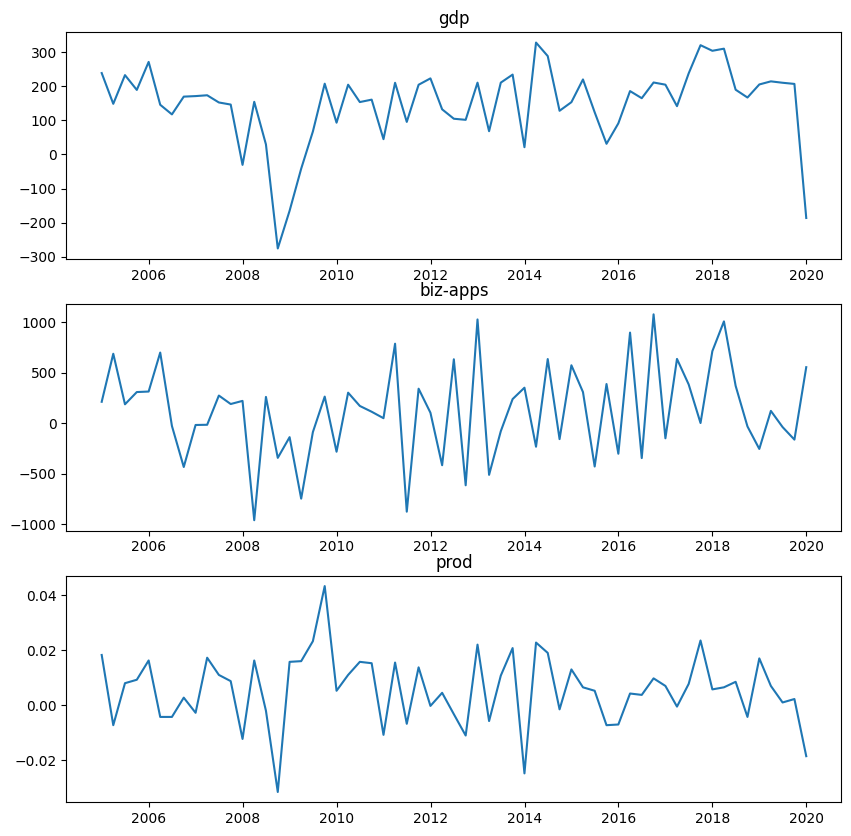

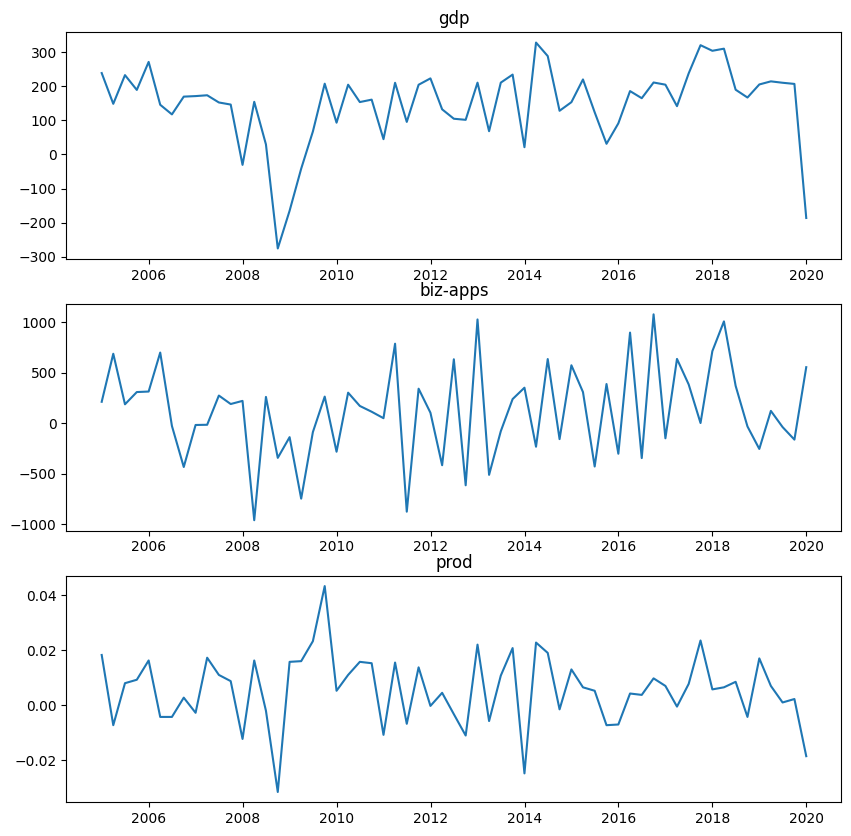

In [20]:
res.plot()

#### Forcasting

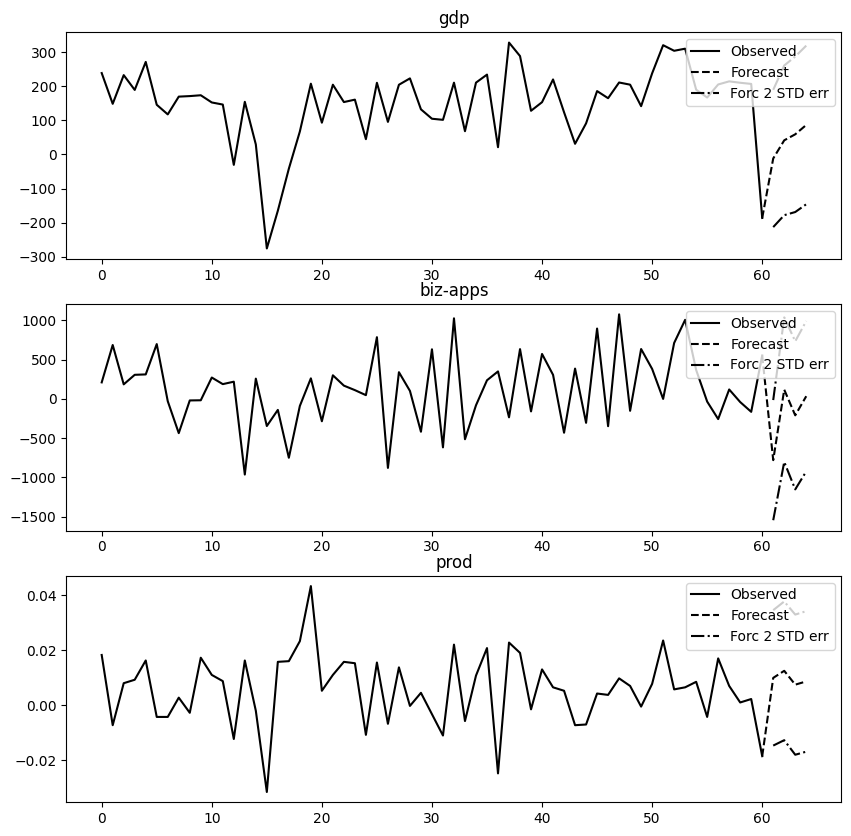

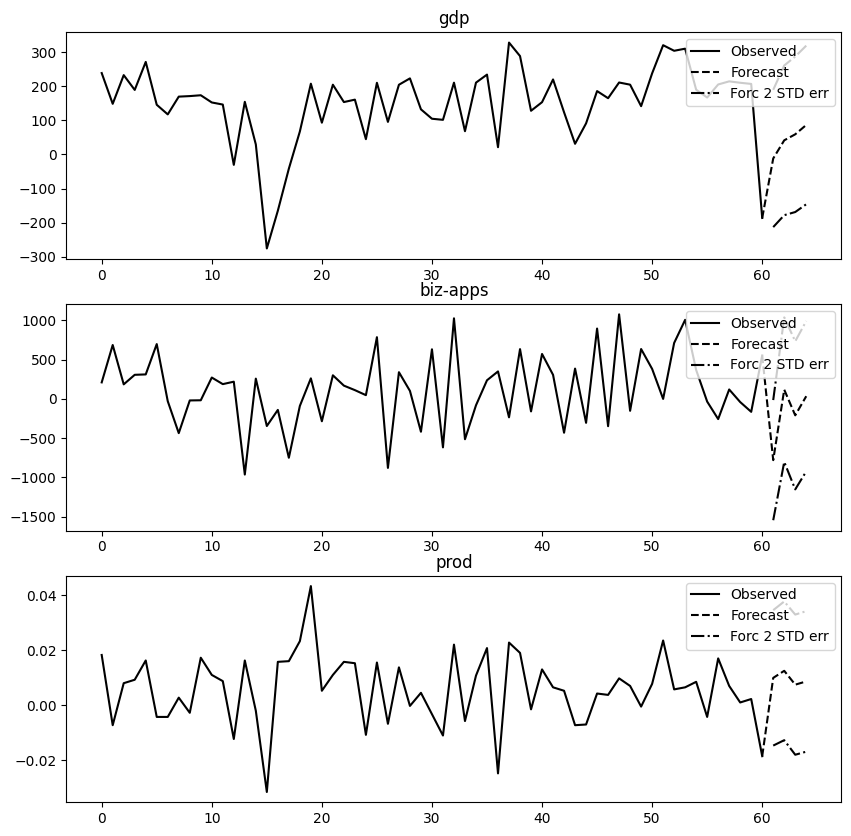

In [21]:
forecast_res = res.forecast(gdp_diff_df.values[-1:], 4)
res.plot_forecast(4)


#### Setup Dataframe with Forecast Data

In [24]:
indx = pd.date_range('6/30/2020', periods=4, freq='QE-DEC')
forecast_df = pd.DataFrame(forecast_res, index=indx, 
                           columns=['f-gdp', 'f-biz-apps', 'f-prod'])
forecast_df

,f-gdp,f-biz-apps,f-prod
2020-06-30,-11.649082,-779.058239,0.009930
2020-09-30,41.576289,118.196268,0.012493
2020-12-31,59.255006,-208.639970,0.007466
2021-03-31,86.672287,34.852294,0.008646


#### Ubdoing a Difference

In [25]:
ex_df = pd.DataFrame({'A': np.random.randint(0, 10, 5)})
ex_df['B'] = ex_df['A'].diff()
ex_df

,A,B
0,1,NaN
1,4,3.0
2,8,4.0
3,2,-6.0
4,1,-1.0


In [26]:
x , x_diff = ex_df['A'].iloc[0], ex_df['B'].iloc[1:]
ex_df['C'] = np.r_[x, x_diff].cumsum().astype(float)
ex_df

,A,B,C
0,1,NaN,1.0
1,4,3.0,4.0
2,8,4.0,8.0
3,2,-6.0,2.0
4,1,-1.0,1.0


In [33]:
x , x_diff = gdp_df['gdp'].iloc[0], gdp_diff_df['gdp'].iloc[2:]
n_gdp_df = pd.DataFrame(np.r_[x, x_diff].cumsum().astype(float))
n_gdp_df = n_gdp_df.append(forecast_df['f-gdp'].cumsum(), ignore_index=True)
n_gdp_df.plot(figsize=(16, 8))

AttributeError: 'DataFrame' object has no attribute 'append'